#### [My GitHub link](https://github.com/barkhaj/799HAIWK1)!

Welcome to your assignment this week! 


# Classification task
In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [1]:
#!pip install numpy
#!pip install keras
#!pip install tensorflow
#!pip install pandas
#!pip install matplotlib
#!pip install nbconvert

Run the following cell to load the packages you will need.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

#performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [3]:
df = pd.read_csv('data.csv')
df.set_index('id', inplace=True)


print(df.shape)
print(df.head(5))

(4500, 513)
         v1       v2       v3       v4       v5       v6       v7       v8  \
id                                                                           
1   0.37797 -0.94808  0.01346  0.17893  0.37795  0.63571  0.13943 -0.25607   
2   0.07609 -0.09774  0.39666 -0.39026  0.10606  0.52774  0.07105  0.33720   
3   1.19391 -0.68707 -0.68422 -0.36378 -0.60847 -0.40118  1.45432  0.00592   
4   1.34949 -0.31498 -1.30248  0.50278  1.66292 -1.06094 -0.70835 -0.24237   
5  -0.03512 -0.34196  0.14230  1.50513 -0.14364  0.49429  0.07823 -0.04356   

         v9      v10  ...     v504     v505     v506     v507     v508  \
id                    ...                                                
1  -0.39341  1.08947  ... -0.03494  1.32443 -0.94570  0.02055 -1.23908   
2   0.69917 -0.02842  ...  0.86624 -1.24953 -0.21511 -1.54146  1.04765   
3   1.68940 -0.98205  ... -0.35893  0.02330  0.31548 -0.34923 -0.41772   
4  -0.15509 -0.04532  ...  0.23942  0.20774  0.81792 -0.74814 -0.62521 

Now, let's split the data into training and test sets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

#Examine dataset
print("Dataset \n",df.shape)
print(df.head(5))


## The data to use:
X_train = df[df['data_type']=='train'].iloc[:,:512].values
X_test = df[df['data_type']=='test'].iloc[:,:512].values
y_train = df[df['data_type']=='train'].iloc[:,512:513].values
y_test = df[df['data_type']=='test'].iloc[:,512:513].values


#Examine training and test data
print("X_train\n",X_train.shape)
print("X_test \n",X_test.shape)

Dataset 
 (4500, 514)
         v1       v2       v3       v4       v5       v6       v7       v8  \
id                                                                           
1   0.37797 -0.94808  0.01346  0.17893  0.37795  0.63571  0.13943 -0.25607   
2   0.07609 -0.09774  0.39666 -0.39026  0.10606  0.52774  0.07105  0.33720   
3   1.19391 -0.68707 -0.68422 -0.36378 -0.60847 -0.40118  1.45432  0.00592   
4   1.34949 -0.31498 -1.30248  0.50278  1.66292 -1.06094 -0.70835 -0.24237   
5  -0.03512 -0.34196  0.14230  1.50513 -0.14364  0.49429  0.07823 -0.04356   

         v9      v10  ...     v505     v506     v507     v508     v509  \
id                    ...                                                
1  -0.39341  1.08947  ...  1.32443 -0.94570  0.02055 -1.23908  0.43507   
2   0.69917 -0.02842  ... -1.24953 -0.21511 -1.54146  1.04765 -1.24035   
3   1.68940 -0.98205  ...  0.02330  0.31548 -0.34923 -0.41772 -0.58175   
4  -0.15509 -0.04532  ...  0.20774  0.81792 -0.74814 -0.62521

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [5]:
# Build the model
model = Sequential([
  Dense(12, activation='relu', input_shape=(512,)),
  Dense(64, activation='relu'),
  Dense(1, activation='sigmoid'),
])

# Compile the model
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)


# Training

Now, let's start our training.

In [6]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)

Epoch 1/200
60/60 [==============================] - 1s 2ms/step - loss: 0.6232 - accuracy: 0.6268
Epoch 2/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.8785
Epoch 3/200
60/60 [==============================] - 0s 659us/step - loss: 0.0824 - accuracy: 0.9867
Epoch 4/200
60/60 [==============================] - 0s 642us/step - loss: 0.0261 - accuracy: 0.9963
Epoch 5/200
60/60 [==============================] - 0s 643us/step - loss: 0.0099 - accuracy: 0.9992
Epoch 6/200
60/60 [==============================] - 0s 626us/step - loss: 0.0055 - accuracy: 0.9999
Epoch 7/200
60/60 [==============================] - 0s 609us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 8/200
60/60 [==============================] - 0s 617us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/200
60/60 [==============================] - 0s 606us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/200
60/60 [==============================] - 0s 625us/step - loss: 0.0012 - accuracy: 

60/60 [==============================] - 0s 629us/step - loss: 4.8617e-06 - accuracy: 1.0000
Epoch 79/200
60/60 [==============================] - 0s 627us/step - loss: 4.6248e-06 - accuracy: 1.0000
Epoch 80/200
60/60 [==============================] - 0s 642us/step - loss: 4.6597e-06 - accuracy: 1.0000
Epoch 81/200
60/60 [==============================] - 0s 629us/step - loss: 4.6175e-06 - accuracy: 1.0000
Epoch 82/200
60/60 [==============================] - 0s 642us/step - loss: 3.9866e-06 - accuracy: 1.0000
Epoch 83/200
60/60 [==============================] - 0s 627us/step - loss: 4.4298e-06 - accuracy: 1.0000
Epoch 84/200
60/60 [==============================] - 0s 642us/step - loss: 4.0796e-06 - accuracy: 1.0000
Epoch 85/200
60/60 [==============================] - 0s 625us/step - loss: 3.7088e-06 - accuracy: 1.0000
Epoch 86/200
60/60 [==============================] - 0s 625us/step - loss: 3.7729e-06 - accuracy: 1.0000
Epoch 87/200
60/60 [==============================] - 0s 62

60/60 [==============================] - 0s 659us/step - loss: 2.8456e-07 - accuracy: 1.0000
Epoch 155/200
60/60 [==============================] - 0s 659us/step - loss: 2.7389e-07 - accuracy: 1.0000
Epoch 156/200
60/60 [==============================] - 0s 659us/step - loss: 2.4648e-07 - accuracy: 1.0000
Epoch 157/200
60/60 [==============================] - 0s 693us/step - loss: 2.5299e-07 - accuracy: 1.0000
Epoch 158/200
60/60 [==============================] - 0s 1ms/step - loss: 2.4331e-07 - accuracy: 1.0000
Epoch 159/200
60/60 [==============================] - 0s 705us/step - loss: 2.4195e-07 - accuracy: 1.0000
Epoch 160/200
60/60 [==============================] - 0s 727us/step - loss: 2.4471e-07 - accuracy: 1.0000
Epoch 161/200
60/60 [==============================] - 0s 659us/step - loss: 2.0848e-07 - accuracy: 1.0000
Epoch 162/200
60/60 [==============================] - 0s 662us/step - loss: 2.1603e-07 - accuracy: 1.0000
Epoch 163/200
60/60 [==============================] 

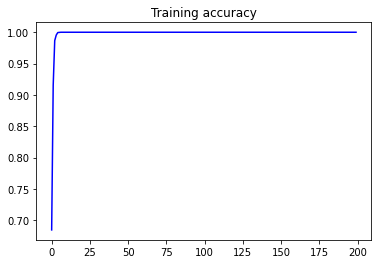

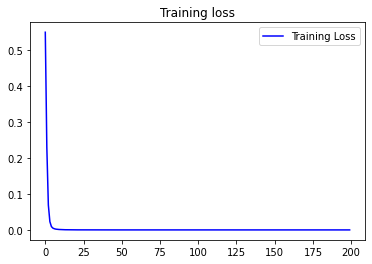

In [7]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# Task 2

Test the model on the test set and report Precision, Recall, F1-Score, and Accuracy.

In [8]:

y_pred = (model.predict(X_test) > 0.5).astype("int32")
#print(y_pred)

# reduce to 1d array
y_pred = y_pred[:, 0]
#print(y_pred)

#Precision
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# Recall
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)


#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

Precision: 0.990741
Recall: 1.000000
F1 score: 0.995349
Accuracy: 0.994074


Export your notebook to a pdf document

In [9]:
!jupyter nbconvert Task1_3C_Classification_using_FFNN_Submit.ipynb --to pdf

[NbConvertApp] Converting notebook Task1_3C_Classification_using_FFNN_Submit.ipynb to pdf
[NbConvertApp] Support files will be in Task1_3C_Classification_using_FFNN_Submit_files\
[NbConvertApp] Making directory .\Task1_3C_Classification_using_FFNN_Submit_files
[NbConvertApp] Making directory .\Task1_3C_Classification_using_FFNN_Submit_files
[NbConvertApp] Writing 58924 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 75305 bytes to Task1_3C_Classification_using_FFNN_Submit.pdf


# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 



### References

Brownlee J (2019) ['How to Calculate Precision, Recall, F1, and More for Deep Learning Models'](https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models), Deep Learning, Machine Learning Mastery, post Mar 29, accessed 28 July 2021

Brownlee J (2019) ['Your First Deep Learning Project in Python with Keras Step-By-Step'](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/), Deep Learning, Machine Learning Mastery, post Jul 24, accessed 27 July 2021

Zhou V (2019), ['Keras for Beginners: Building Your First Neural Network'](https://victorzhou.com/blog/keras-neural-network-tutorial/), accessed 26 July 2021
